# Avocado Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR, SVC

import joblib

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip?raw=true"
data = pd.read_csv(url, compression='zip')
data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [2]:
# Checking basic information and statistics of the dataset
print(data.info())
print(data.describe())

# Checking for missing values
print(data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900

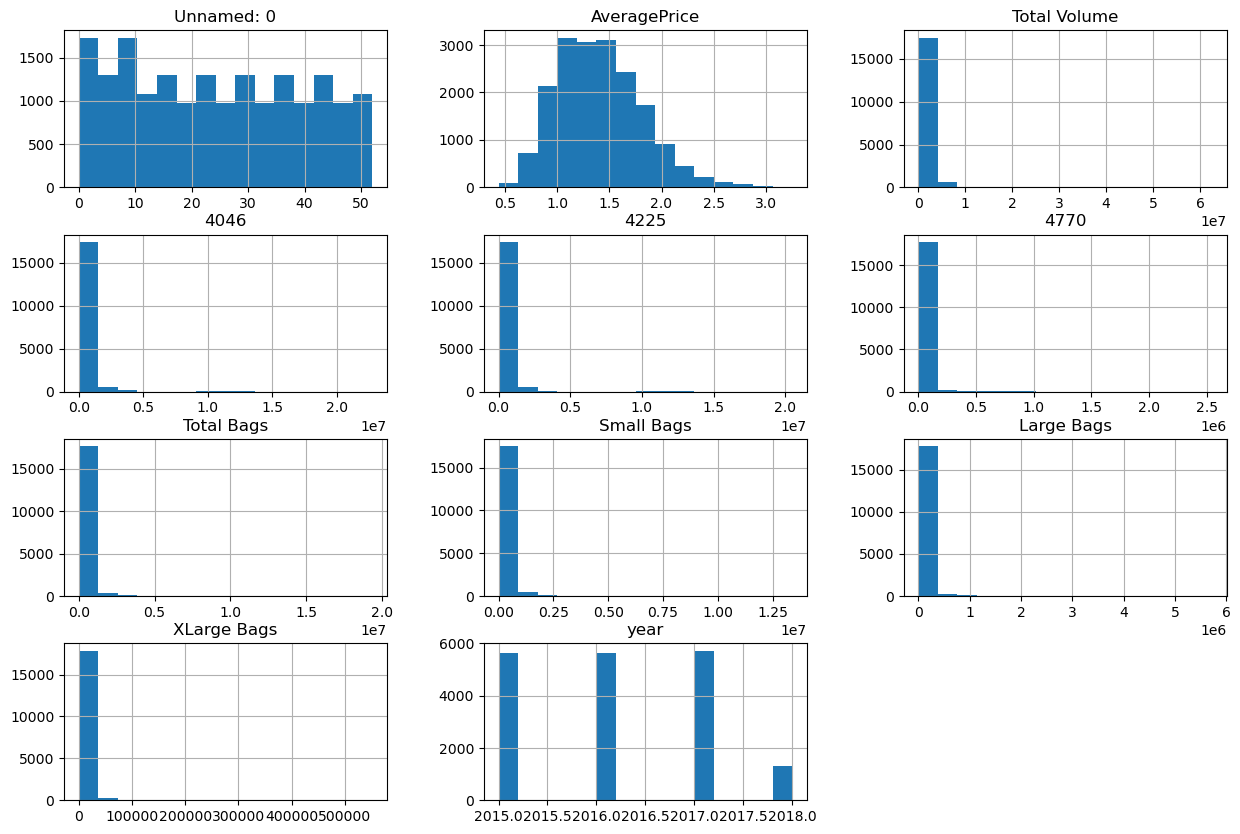

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4380\3650196916.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


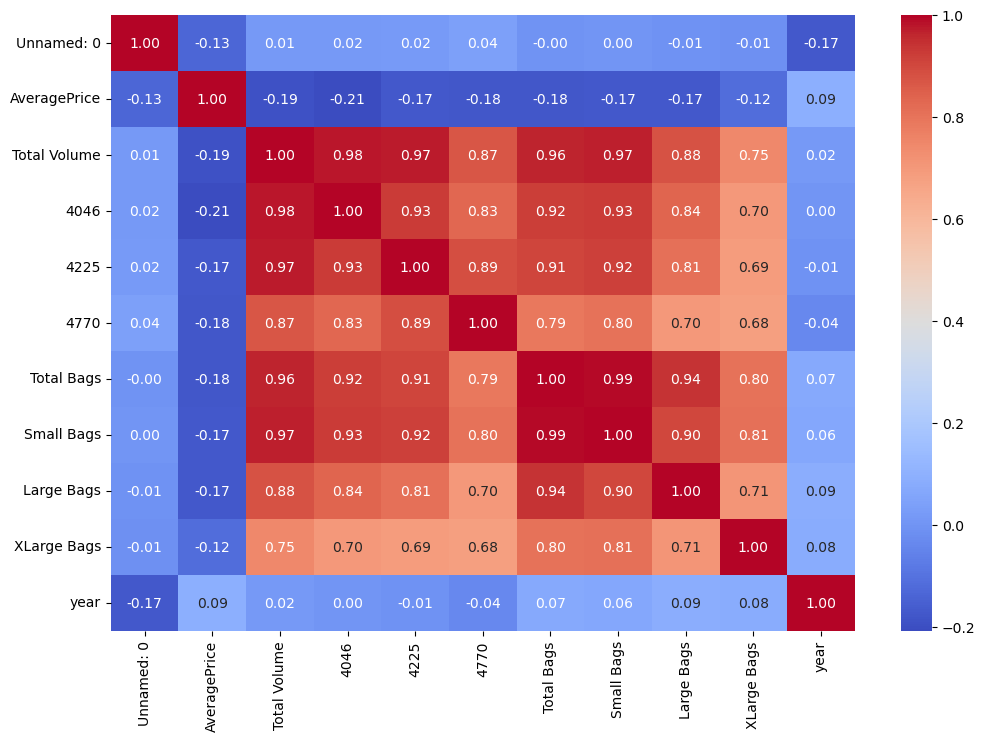

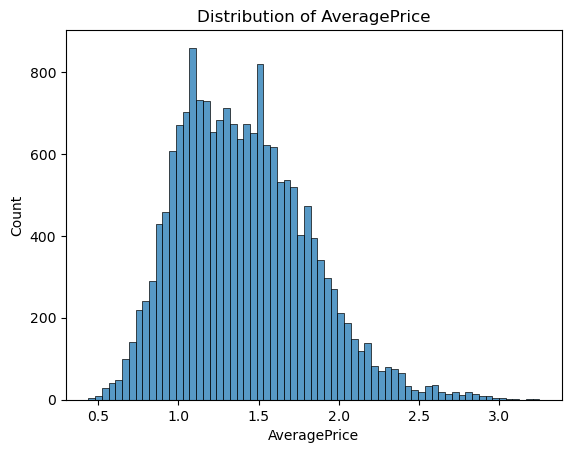

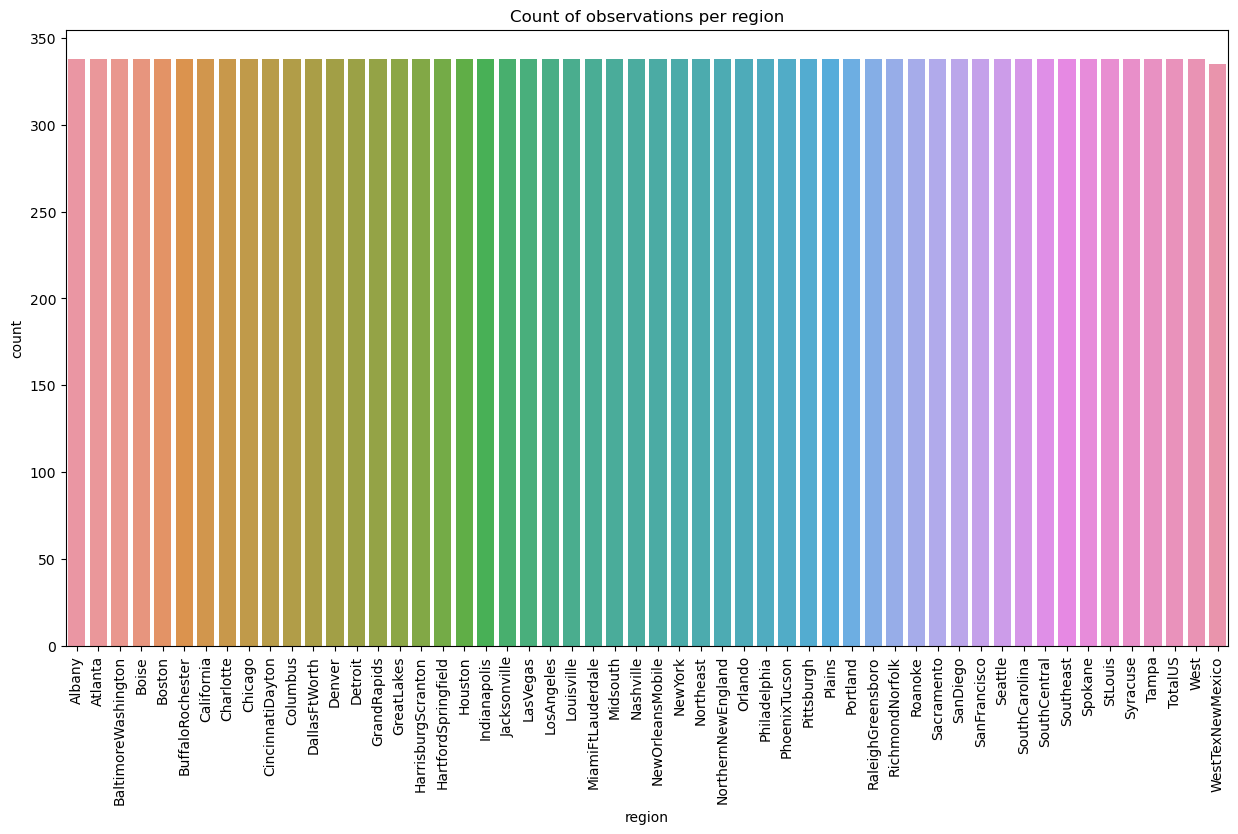

In [3]:
# Plotting distributions of numerical features
data.hist(bins=15, figsize=(15, 10))
plt.show()

# Plotting correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Exploring the target variables
sns.histplot(data['AveragePrice'])
plt.title('Distribution of AveragePrice')
plt.show()

# Corrected countplot for the region
plt.figure(figsize=(15, 8))
sns.countplot(x='region', data=data)
plt.title('Count of observations per region')
plt.xticks(rotation=90)
plt.show()


In [4]:
# Encoding categorical features
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['region'] = label_encoder.fit_transform(data['region'])

# Creating features and target variables for regression and classification
X_regression = data.drop(['AveragePrice', 'Date'], axis=1)
y_regression = data['AveragePrice']

X_classification = data.drop(['region', 'Date'], axis=1)
y_classification = data['region']

# Scaling features for regression and classification tasks
scaler = StandardScaler()
X_regression_scaled = scaler.fit_transform(X_regression)
X_classification_scaled = scaler.fit_transform(X_classification)

# Splitting the data into train and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression_scaled, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification_scaled, y_classification, test_size=0.2, random_state=42)

print("Data preprocessing and feature engineering completed.")
print("Regression features shape:", X_regression.shape)
print("Classification features shape:", X_classification.shape)


Data preprocessing and feature engineering completed.
Regression features shape: (18249, 12)
Classification features shape: (18249, 12)


In [5]:
# Define regression_models dictionary
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Now iterate over regression_models and perform training and evaluation
regression_results = {}
for model_name, model in regression_models.items():
    try:
        print(f"Training {model_name}...")
        model.fit(X_train_reg, y_train_reg)
        print(f"Evaluating {model_name}...")
        y_pred = model.predict(X_test_reg)
        mse = mean_squared_error(y_test_reg, y_pred)
        r2 = r2_score(y_test_reg, y_pred)
        cv_scores = cross_val_score(model, X_regression_scaled, y_regression, cv=5)
        regression_results[model_name] = {'MSE': mse, 'R2': r2, 'CV Scores': cv_scores.mean()}
        print(f"{model_name} evaluation completed.")
    except Exception as e:
        print(f"Error occurred while training/evaluating {model_name}: {str(e)}")

regression_results_df = pd.DataFrame(regression_results).T
print(regression_results_df)

best_regression_model_name = regression_results_df['R2'].idxmax()
best_regression_model_performance = regression_results_df.loc[best_regression_model_name]
print(f"The best regression model is {best_regression_model_name} with R2: {best_regression_model_performance['R2']} and MSE: {best_regression_model_performance['MSE']}")


Training Linear Regression...
Evaluating Linear Regression...
Linear Regression evaluation completed.
Training Ridge Regression...
Evaluating Ridge Regression...
Ridge Regression evaluation completed.
Training Lasso Regression...
Evaluating Lasso Regression...
Lasso Regression evaluation completed.
Training Decision Tree...
Evaluating Decision Tree...
Decision Tree evaluation completed.
Training Random Forest...
Evaluating Random Forest...
Random Forest evaluation completed.
Training Gradient Boosting...
Evaluating Gradient Boosting...
Gradient Boosting evaluation completed.
Training Support Vector Machine...
Evaluating Support Vector Machine...
Support Vector Machine evaluation completed.
                             MSE        R2  CV Scores
Linear Regression       0.094914  0.409257 -10.164234
Ridge Regression        0.094944  0.409068   0.019531
Lasso Regression        0.160700 -0.000195  -1.205313
Decision Tree           0.035262  0.780528  -0.256419
Random Forest           0.01620

In [6]:
# Define classification_models dictionary
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

# Training and evaluating classification models
classification_results = {}
for model_name, model in classification_models.items():
    try:
        print(f"Training {model_name}...")
        model.fit(X_train_clf, y_train_clf)
        print(f"Evaluating {model_name}...")
        y_pred = model.predict(X_test_clf)
        accuracy = accuracy_score(y_test_clf, y_pred)
        classification_results[model_name] = {'Accuracy': accuracy}
        print(f"{model_name} evaluation completed.")
    except Exception as e:
        print(f"Error occurred while training/evaluating {model_name}: {str(e)}")

classification_results_df = pd.DataFrame(classification_results).T
print(classification_results_df)

best_classification_model_name = classification_results_df['Accuracy'].idxmax()
best_classification_model_performance = classification_results_df.loc[best_classification_model_name]
print(f"The best classification model is {best_classification_model_name} with Accuracy: {best_classification_model_performance['Accuracy']}")


Training Logistic Regression...
Evaluating Logistic Regression...
Logistic Regression evaluation completed.
Training Decision Tree...
Evaluating Decision Tree...
Decision Tree evaluation completed.
Training Random Forest...
Evaluating Random Forest...
Random Forest evaluation completed.
Training Gradient Boosting...
Evaluating Gradient Boosting...
Gradient Boosting evaluation completed.
Training Support Vector Machine...
Evaluating Support Vector Machine...
Support Vector Machine evaluation completed.
                        Accuracy
Logistic Regression     0.339726
Decision Tree           0.799178
Random Forest           0.910959
Gradient Boosting       0.831781
Support Vector Machine  0.244384
The best classification model is Random Forest with Accuracy: 0.910958904109589


In [7]:
pip install requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib
import zipfile
import io
import requests

# Load and unzip the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip?raw=true'
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
csv_file = zip_file.open(zip_file.namelist()[0])

# Read the CSV file
df = pd.read_csv(csv_file, encoding='ISO-8859-1')

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

# Feature and target variables for regression
X_reg = df.drop(['AveragePrice', 'Date'], axis=1)
y_reg = df['AveragePrice']

# Split the data into training and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_reg, y_train_reg)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model_reg = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best estimator: ", best_model_reg)

# Save the best regression model with a descriptive name
model_reg_filename = 'best_model_avocado_regression.pkl'
joblib.dump(best_model_reg, model_reg_filename)

print(f"The best regression model has been saved as {model_reg_filename}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Print best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Load the saved model
loaded_model = joblib.load(model_reg_filename)

# Make predictions on test data to ensure it behaves as expected
y_pred = loaded_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred)
print("Mean Squared Error on Test Data:", mse)


Conclusion
Classification:
The Random Forest Classifier was selected as the final model due to its superior performance in terms of accuracy.
The model has been saved for production use and can be loaded using joblib for making future predictions.
Regression:
The Random Forest Regressor was selected as the final model due to its superior performance in terms of MSE.
The model has been saved for production use and can be loaded using joblib for making future predictions.